In [1]:
from Mixture_Models import *

#### Simulating some data

In [2]:
data = make_pinwheel(
    radial_std=0.3,
    tangential_std=0.05,
    num_classes=3,
    num_per_class=100,
    rate=0.4,
    rs=npr.RandomState(0),
)

#### Initializing the model

In [3]:
test_MFA = MFA(data)

#### Initializing the input parameters

In [4]:
npr.seed(10)
init_params = test_MFA.init_params(
    num_components=3, q=1, scale=0.5
)  # q is the latent subspace
print(init_params)

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'fac_loadings': array([[[0.40631048],
        [0.30626303]],

       [[0.36087766],
        [0.14593803]],

       [[0.45888706],
        [0.35728789]]]), 'error': array([[-0.08730011, -0.56830111],
       [ 0.06756844,  0.7422685 ],
       [-0.53990244, -0.98886414]])}


#### Fitting the model with the above initialization parameters

In [5]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.95 and learning rate = 9e-4
params_store = test_MFA.fit(
    init_params, "grad_descent", learning_rate=0.0009, mass=0.95, maxiter=100
)

Log likelihood -820.9286528743613
Log likelihood -794.9923455354419
Log likelihood -756.8125540546928
Log likelihood -721.0082340632347
Log likelihood -694.8228534360811
Log likelihood -678.7467564791962
Log likelihood -670.4990612914061
Log likelihood -667.5876385974994
Log likelihood -668.0277133494151
Log likelihood -670.4180732394948
Log likelihood -673.8287887111362
Log likelihood -677.6590620220114
Log likelihood -681.5254120548805
Log likelihood -685.1856456057579
Log likelihood -688.4895451286352
Log likelihood -691.3471601325994
Log likelihood -693.7082544043135
Log likelihood -695.5487782676721
Log likelihood -696.8617972265206
Log likelihood -697.6512830074864
Log likelihood -697.9277673694876
Log likelihood -697.7052208253522
Log likelihood -696.998739212205
Log likelihood -695.822754707269
Log likelihood -694.1895654872919
Log likelihood -692.1080177290312
Log likelihood -689.5821857516074
Log likelihood -686.6098879545962
Log likelihood -683.180854416145
Log likelihood -6

#### Posthoc analysis

In [6]:
### We define an auxillary function for plotting the clusters
from scipy.linalg import sqrtm


def draw_clusters(unpacked_params, input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, cov_sqrt, error in zip(*unpacked_params):
        cov_sqrt = np.linalg.cholesky(
            (cov_sqrt @ cov_sqrt.T) + (np.diag(error) @ np.diag(error))
        ).T  ### Because this is MFA , there is an additional line
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2 * np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], "-", alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], "k.")
    ax.plot(input_data[:, 0], input_data[:, 1], "k.")

    plt.show()

likelihood -820.9286528743613
aic,bic 1665.8573057487226 1710.302695444597


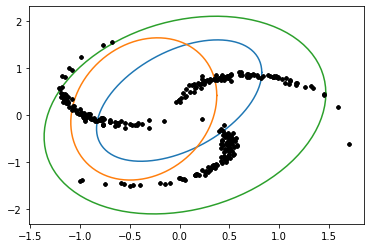

MPKL 0.9701690983547266
likelihood -794.9923455354419
aic,bic 1613.9846910708839 1658.4300807667582


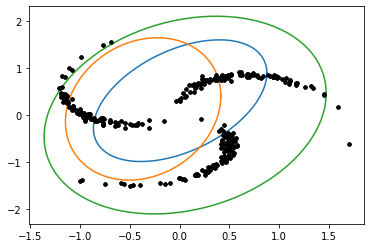

MPKL 0.7929926622227592
likelihood -756.8125540546928
aic,bic 1537.6251081093856 1582.07049780526


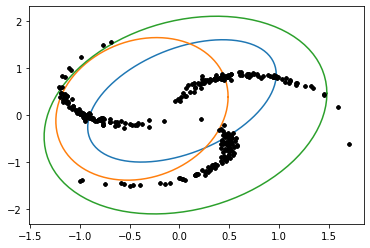

MPKL 0.5609414303157072
likelihood -721.0082340632347
aic,bic 1466.0164681264694 1510.4618578223437


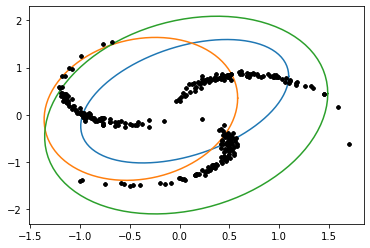

MPKL 0.36644503200225476
likelihood -694.8228534360811
aic,bic 1413.6457068721622 1458.0910965680366


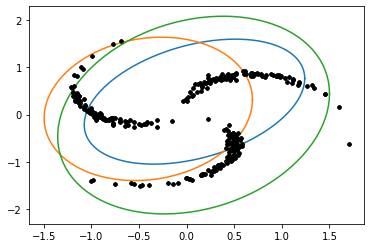

MPKL 0.26848657887175387
likelihood -678.7467564791962
aic,bic 1381.4935129583923 1425.9389026542667


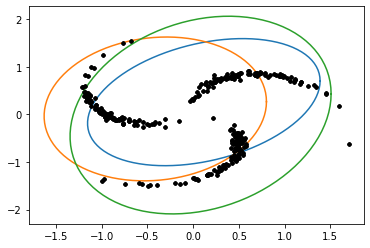

MPKL 0.20644977628357264
likelihood -670.4990612914061
aic,bic 1364.9981225828121 1409.4435122786865


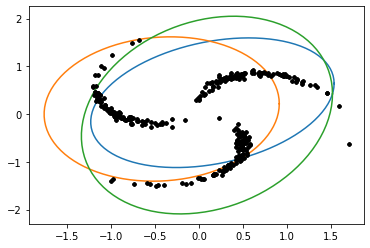

MPKL 0.16307098211214655
likelihood -667.5876385974994
aic,bic 1359.175277194999 1403.6206668908733


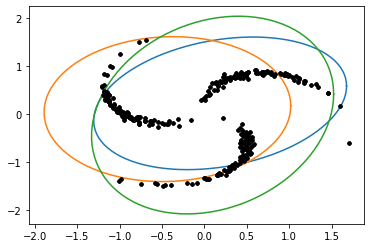

MPKL 0.12908007773706776
likelihood -668.0277133494151
aic,bic 1360.0554266988302 1404.5008163947045


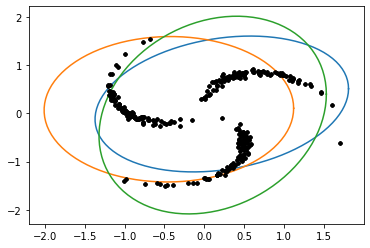

MPKL 0.09903629440879502
likelihood -670.4180732394948
aic,bic 1364.8361464789896 1409.281536174864


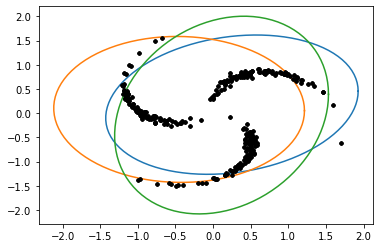

MPKL 0.08255837266145338
likelihood -673.8287887111362
aic,bic 1371.6575774222724 1416.1029671181468


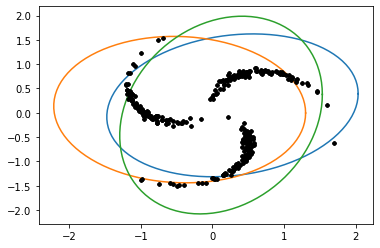

MPKL 0.1303567522602158
likelihood -677.6590620220114
aic,bic 1379.3181240440229 1423.7635137398972


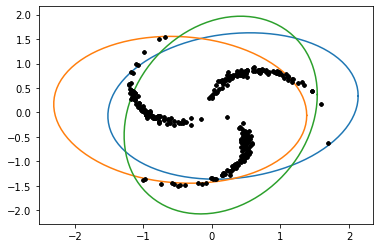

MPKL 0.17940680812439536
likelihood -681.5254120548805
aic,bic 1387.050824109761 1431.4962138056353


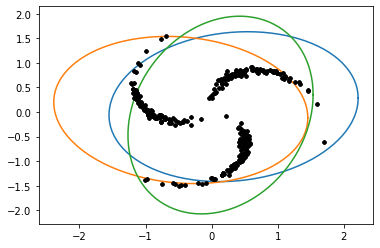

MPKL 0.22988242357423871
likelihood -685.1856456057579
aic,bic 1394.3712912115159 1438.8166809073903


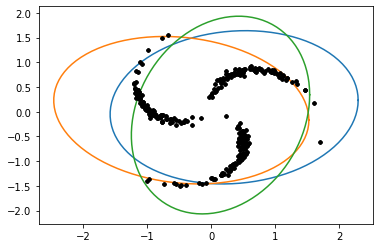

MPKL 0.28164395046336144
likelihood -688.4895451286352
aic,bic 1400.9790902572704 1445.4244799531448


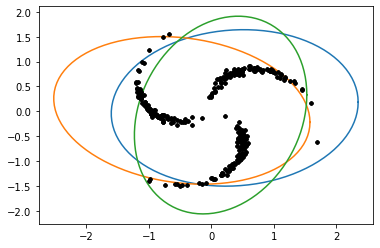

MPKL 0.33441619681310875
likelihood -691.3471601325994
aic,bic 1406.6943202651987 1451.139709961073


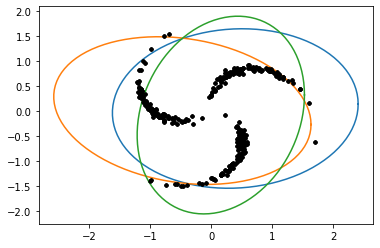

MPKL 0.38788630618291586
likelihood -693.7082544043135
aic,bic 1411.416508808627 1455.8618985045014


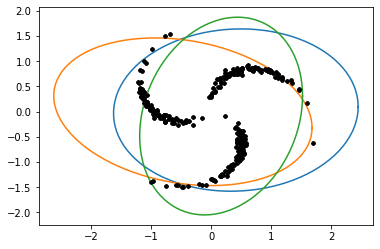

MPKL 0.44175590512081175
likelihood -695.5487782676721
aic,bic 1415.0975565353442 1459.5429462312186


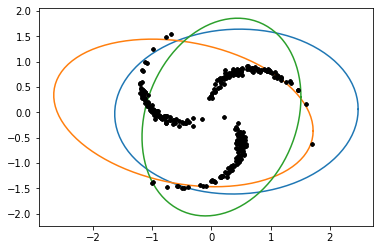

MPKL 0.4957674108547503
likelihood -696.8617972265206
aic,bic 1417.7235944530412 1462.1689841489156


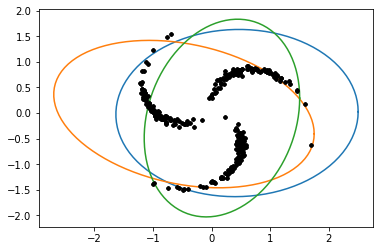

MPKL 0.5497158981482109
likelihood -697.6512830074864
aic,bic 1419.3025660149729 1463.7479557108472


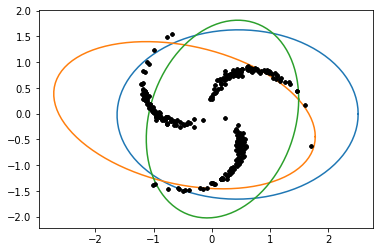

MPKL 0.603452963567257
likelihood -697.9277673694876
aic,bic 1419.8555347389752 1464.3009244348495


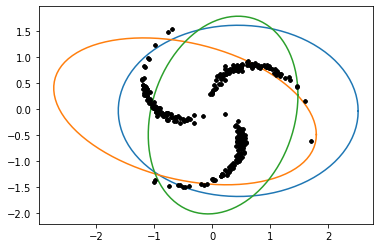

MPKL 0.6568860835584169
likelihood -697.7052208253522
aic,bic 1419.4104416507043 1463.8558313465787


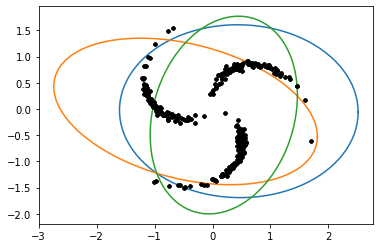

MPKL 0.7099751503098435
likelihood -696.998739212205
aic,bic 1417.99747842441 1462.4428681202844


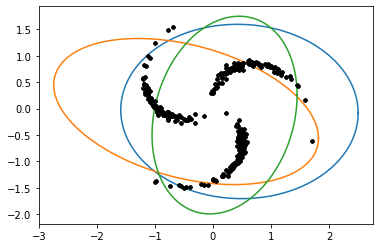

MPKL 0.7627266635231389
likelihood -695.822754707269
aic,bic 1415.645509414538 1460.0908991104125


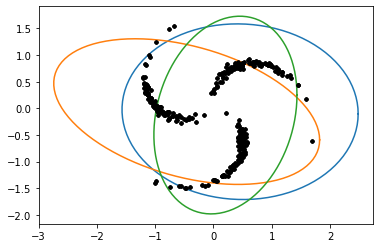

MPKL 0.8151851325090658
likelihood -694.1895654872919
aic,bic 1412.3791309745839 1456.8245206704582


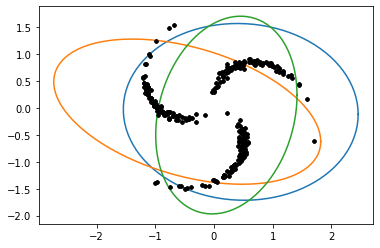

MPKL 0.8674203660976321
likelihood -692.1080177290312
aic,bic 1408.2160354580624 1452.6614251539368


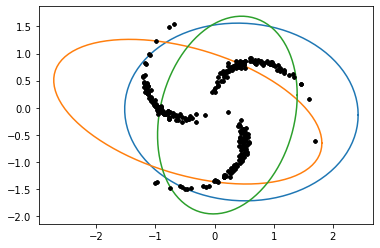

MPKL 0.9195082687454699
likelihood -689.5821857516074
aic,bic 1403.1643715032149 1447.6097611990892


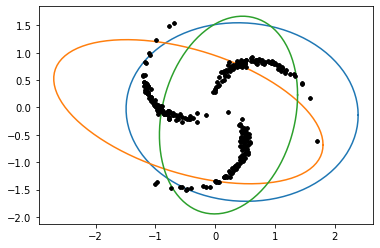

MPKL 0.9715012126769962
likelihood -686.6098879545962
aic,bic 1397.2197759091923 1441.6651656050667


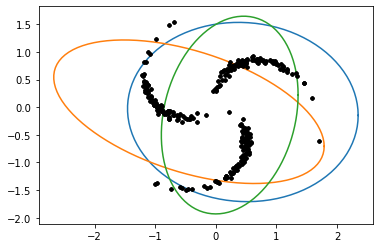

MPKL 1.0233815139910851
likelihood -683.180854416145
aic,bic 1390.36170883229 1434.8070985281645


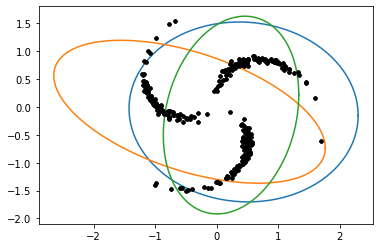

MPKL 1.0749871021212036
likelihood -679.2743369597141
aic,bic 1382.5486739194282 1426.9940636153026


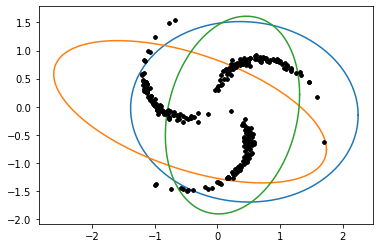

MPKL 1.1258904474540077
likelihood -674.8559471354813
aic,bic 1373.7118942709626 1418.157283966837


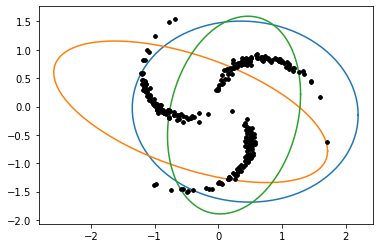

MPKL 1.1751969384728582
likelihood -669.8735759154873
aic,bic 1363.7471518309746 1408.192541526849


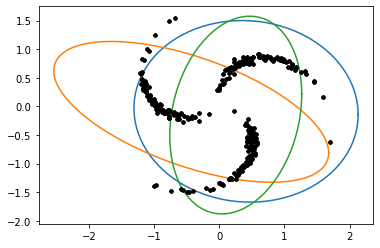

MPKL 1.2212006590863158
likelihood -664.2525094552007
aic,bic 1352.5050189104013 1396.9504086062757


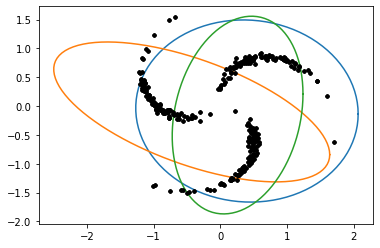

MPKL 1.2607803736425964
likelihood -657.8905310400748
aic,bic 1339.7810620801497 1384.226451776024


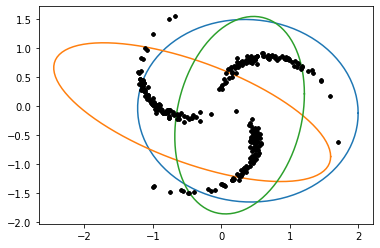

MPKL 1.2883070829250611
likelihood -650.6551928259807
aic,bic 1325.3103856519615 1369.7557753478359


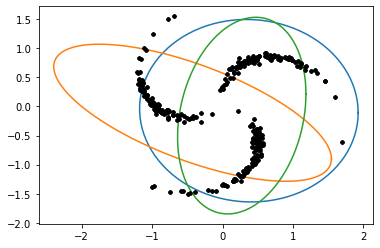

MPKL 1.2935993725165735
likelihood -642.3876082259594
aic,bic 1308.7752164519188 1353.2206061477932


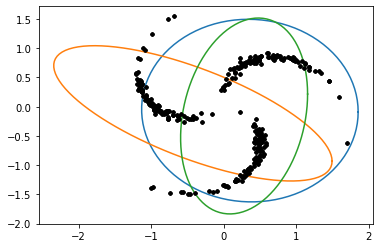

MPKL 1.2579388181619002
likelihood -632.9189664980329
aic,bic 1289.8379329960658 1334.2833226919402


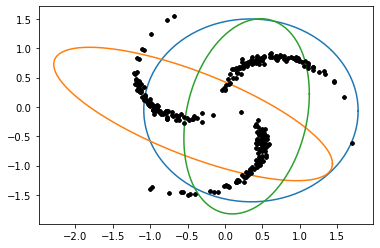

MPKL 1.1459066254568309
likelihood -622.1054044382208
aic,bic 1268.2108088764417 1312.656198572316


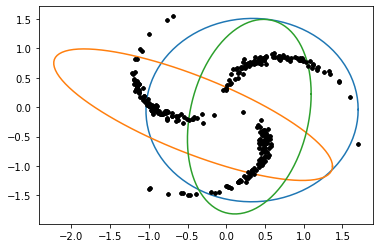

MPKL 1.656102095008428
likelihood -609.8919690157275
aic,bic 1243.783938031455 1288.2293277273293


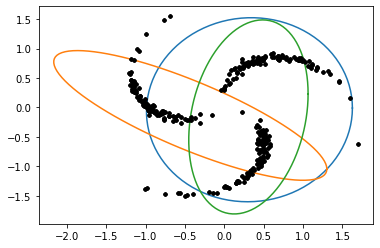

MPKL 2.64232726623959
likelihood -596.483623342883
aic,bic 1216.967246685766 1261.4126363816404


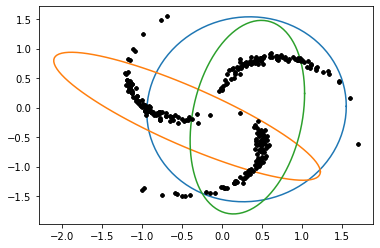

MPKL 4.469202502262425
likelihood -582.8562622844722
aic,bic 1189.7125245689444 1234.1579142648188


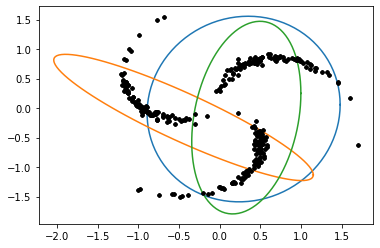

MPKL 8.182471627187644
likelihood -571.4999162586456
aic,bic 1166.9998325172912 1211.4452222131656


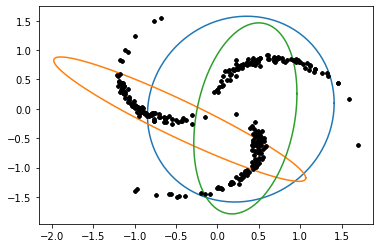

MPKL 16.660423345422466
likelihood -565.4442069314525
aic,bic 1154.888413862905 1199.3338035587794


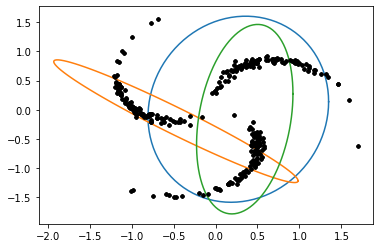

MPKL 38.05759346908274
likelihood -564.0601845609092
aic,bic 1152.1203691218184 1196.5657588176928


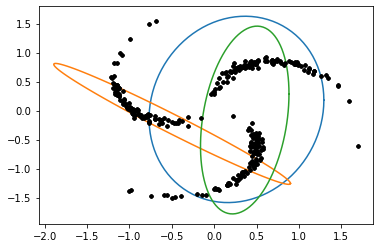

MPKL 84.19035955300465
likelihood -561.7476651831058
aic,bic 1147.4953303662116 1191.940720062086


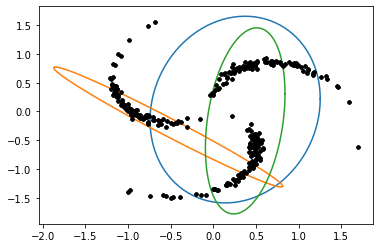

MPKL 106.65193608594743
likelihood -554.9170140353754
aic,bic 1133.8340280707507 1178.279417766625


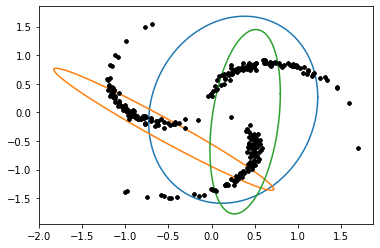

MPKL 76.84945372653235
likelihood -541.9477904926316
aic,bic 1107.8955809852632 1152.3409706811376


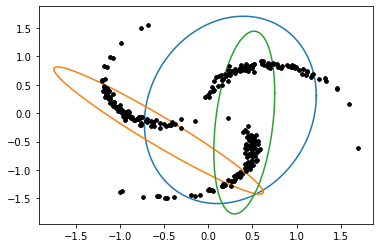

MPKL 47.71058130380891
likelihood -533.1436225044032
aic,bic 1090.2872450088064 1134.7326347046808


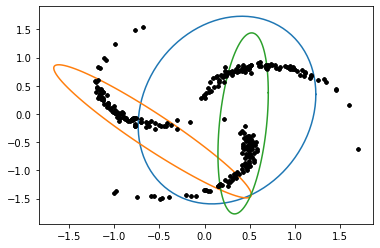

MPKL 34.26858622503503
likelihood -523.2821484983424
aic,bic 1070.5642969966848 1115.0096866925592


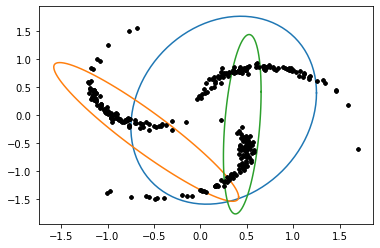

MPKL 45.58791371463211
likelihood -515.4459522979645
aic,bic 1054.891904595929 1099.3372942918033


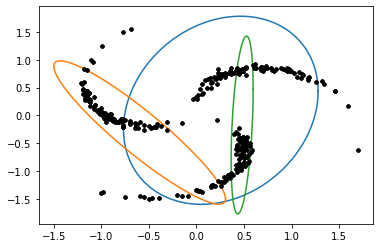

MPKL 213.83673095829832
likelihood -539.8045990272501
aic,bic 1103.6091980545002 1148.0545877503746


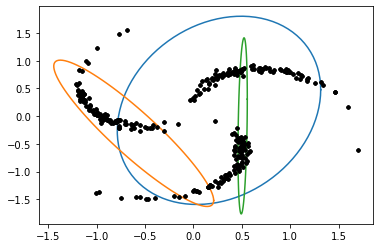

MPKL 1343.637514446795
likelihood -527.0288291262448
aic,bic 1078.0576582524895 1122.503047948364


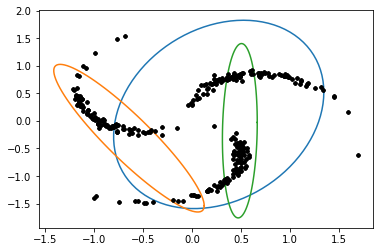

MPKL 56.176311495702556
likelihood -532.0563367300647
aic,bic 1088.1126734601294 1132.5580631560038


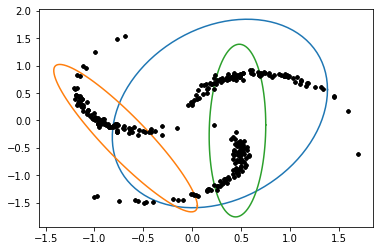

MPKL 42.55720842417768
likelihood -534.3526512440895
aic,bic 1092.705302488179 1137.1506921840535


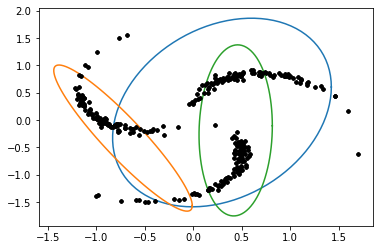

MPKL 54.67974824557952
likelihood -539.4972640731554
aic,bic 1102.9945281463108 1147.4399178421852


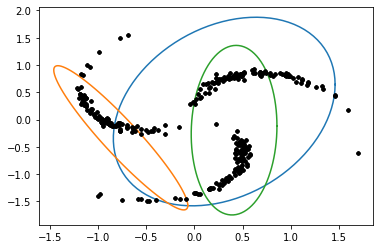

MPKL 77.43732388157095
likelihood -547.617265977427
aic,bic 1119.234531954854 1163.6799216507284


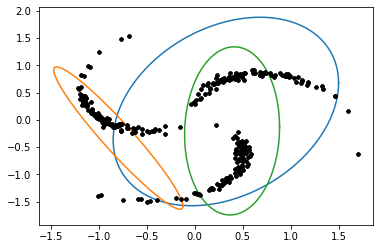

MPKL 119.97991200892271
likelihood -551.1032157415323
aic,bic 1126.2064314830645 1170.651821178939


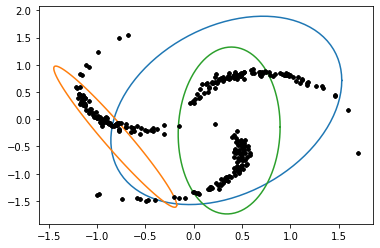

MPKL 194.51660936344558
likelihood -548.8227126778869
aic,bic 1121.6454253557738 1166.0908150516482


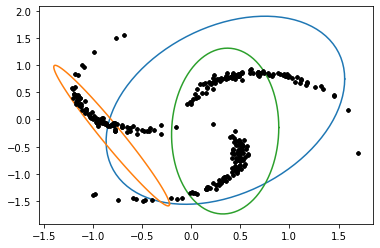

MPKL 294.2859748754077
likelihood -554.4631347787561
aic,bic 1132.9262695575121 1177.3716592533865


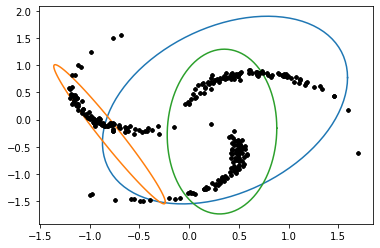

MPKL 323.4562706990387
likelihood -540.0113791976949
aic,bic 1104.0227583953897 1148.468148091264


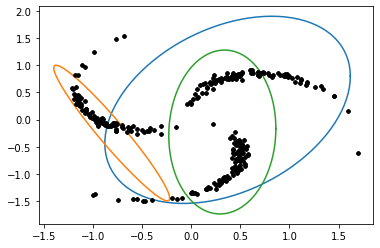

MPKL 186.46454584236082
likelihood -536.3931501036118
aic,bic 1096.7863002072236 1141.231689903098


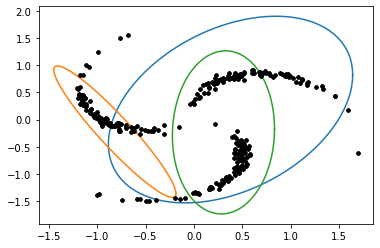

MPKL 112.57660407273991
likelihood -534.0154181871403
aic,bic 1092.0308363742806 1136.476226070155


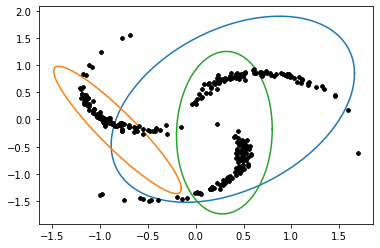

MPKL 80.04536020531545
likelihood -529.302319910701
aic,bic 1082.604639821402 1127.0500295172765


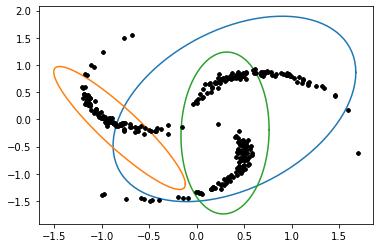

MPKL 65.29473195974677
likelihood -522.7727497907101
aic,bic 1069.5454995814202 1113.9908892772946


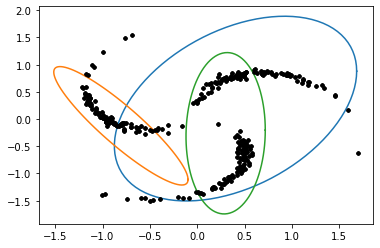

MPKL 59.873562325301805
likelihood -515.7208014502206
aic,bic 1055.4416029004412 1099.8869925963156


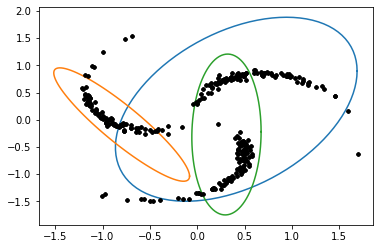

MPKL 60.8127238876607
likelihood -509.3482739012832
aic,bic 1042.6965478025663 1087.141937498441


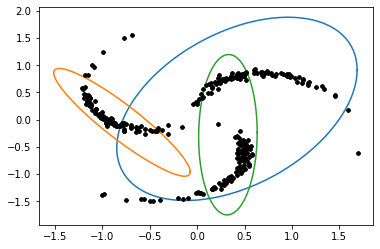

MPKL 67.22354996289064
likelihood -503.1092965441317
aic,bic 1030.2185930882633 1074.663982784138


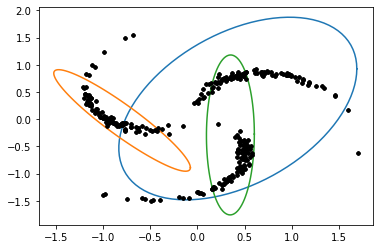

MPKL 78.5176278539216
likelihood -492.3276548174527
aic,bic 1008.6553096349054 1053.10069933078


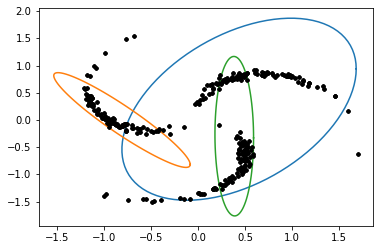

MPKL 93.20157624320197
likelihood -476.0109442912015
aic,bic 976.021888582403 1020.4672782782774


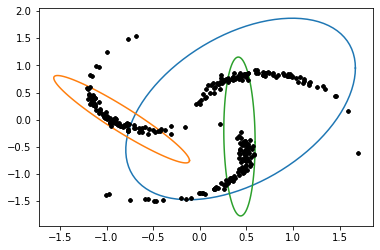

MPKL 111.64535149644247
likelihood -466.3253383026619
aic,bic 956.6506766053238 1001.0960663011982


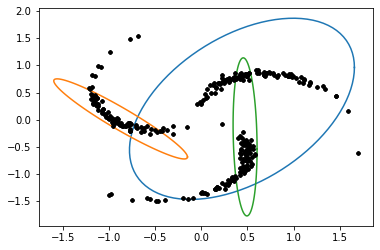

MPKL 172.97855115260813
likelihood -491.866530018536
aic,bic 1007.733060037072 1052.1784497329465


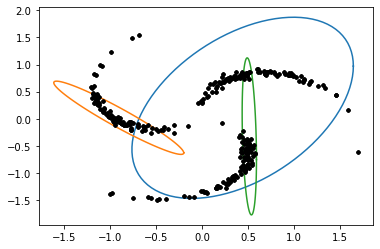

MPKL 685.6422478961529
likelihood -478.99618411733127
aic,bic 981.9923682346625 1026.437757930537


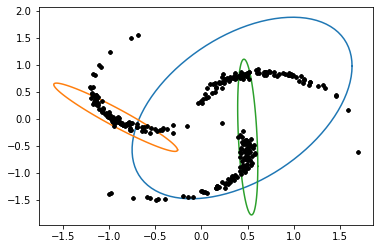

MPKL 328.5297393900113
likelihood -458.15944260005625
aic,bic 940.3188852001125 984.7642748959869


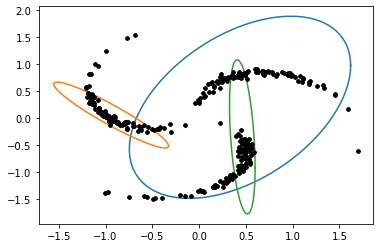

MPKL 187.5546376547475
likelihood -458.02027531933936
aic,bic 940.0405506386787 984.4859403345531


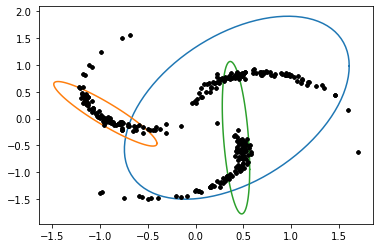

MPKL 161.4365310348333
likelihood -459.05437297821436
aic,bic 942.1087459564287 986.5541356523031


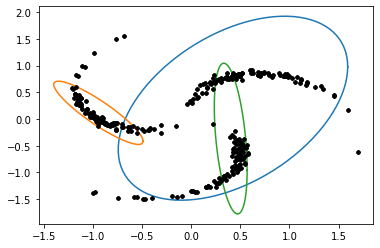

MPKL 145.41401975269443
likelihood -458.02914070370497
aic,bic 940.0582814074099 984.5036711032843


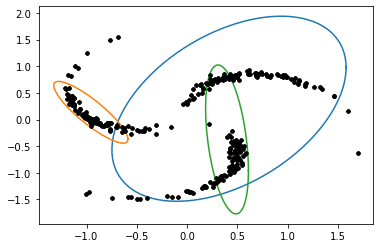

MPKL 166.28387577658495
likelihood -462.9143429191281
aic,bic 949.8286858382562 994.2740755341306


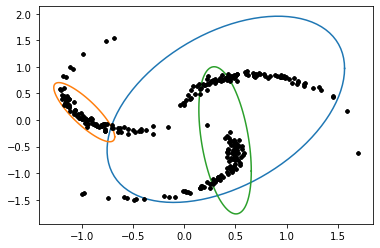

MPKL 193.66738610781383
likelihood -468.6877898775008
aic,bic 961.3755797550016 1005.820969450876


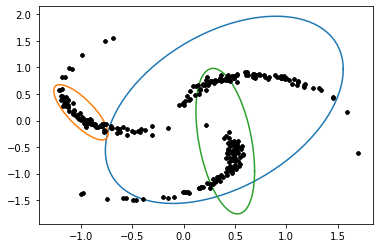

MPKL 186.88271807691598
likelihood -471.14512755612986
aic,bic 966.2902551122597 1010.7356448081341


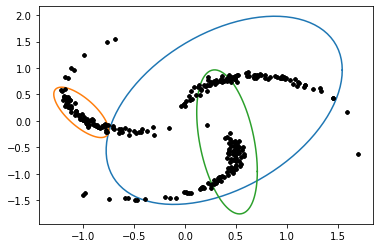

MPKL 149.0143306896872
likelihood -470.38644393862523
aic,bic 964.7728878772505 1009.2182775731249


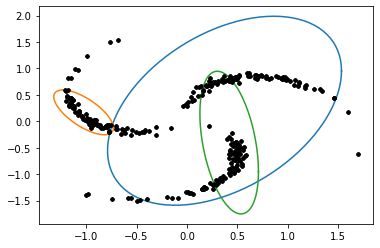

MPKL 120.62360331491232
likelihood -469.53075881430436
aic,bic 963.0615176286087 1007.5069073244831


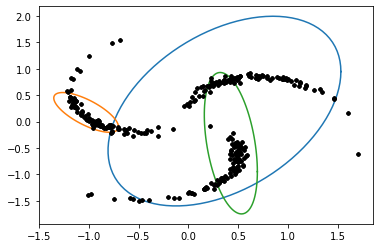

MPKL 117.0184604010788
likelihood -464.5509392127726
aic,bic 953.1018784255452 997.5472681214196


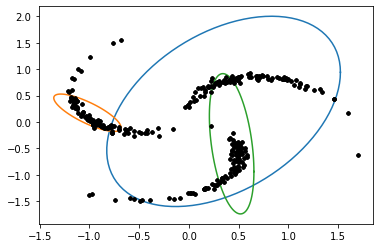

MPKL 146.900341833766
likelihood -447.2157992252702
aic,bic 918.4315984505404 962.8769881464148


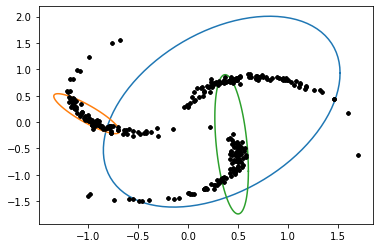

MPKL 238.58350503997252
likelihood -439.21363028496927
aic,bic 902.4272605699385 946.8726502658129


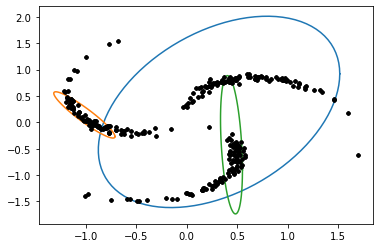

MPKL 485.6393767213274
likelihood -443.0203731833554
aic,bic 910.0407463667108 954.4861360625852


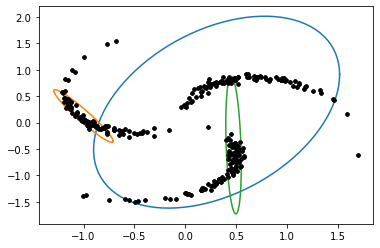

MPKL 745.7475714315808
likelihood -444.3675696818179
aic,bic 912.7351393636358 957.1805290595101


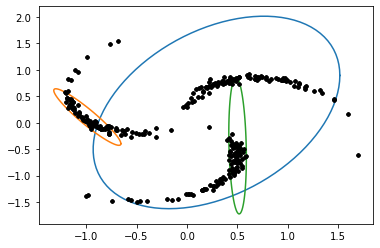

MPKL 411.5333860485476
likelihood -439.16404587183945
aic,bic 902.3280917436789 946.7734814395533


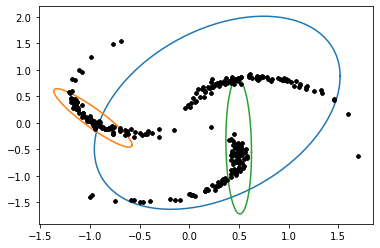

MPKL 226.24094525936982
likelihood -438.16619595765167
aic,bic 900.3323919153033 944.7777816111777


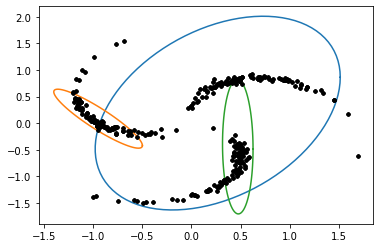

MPKL 159.2626756157686
likelihood -441.02224291059815
aic,bic 906.0444858211963 950.4898755170707


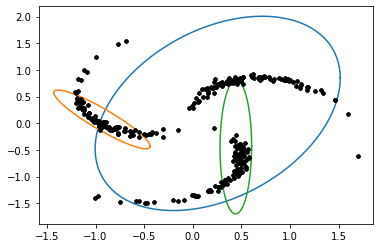

MPKL 141.45201480020017
likelihood -447.9303295716437
aic,bic 919.8606591432874 964.3060488391618


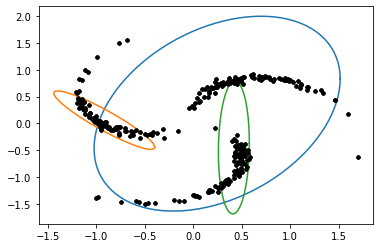

MPKL 149.86977089066548
likelihood -451.1485551053711
aic,bic 926.2971102107422 970.7424999066166


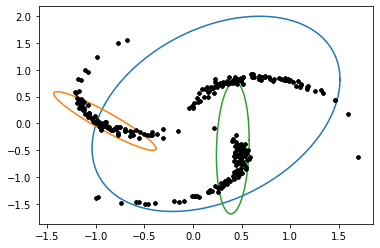

MPKL 173.9144497344082
likelihood -447.2972635673638
aic,bic 918.5945271347276 963.039916830602


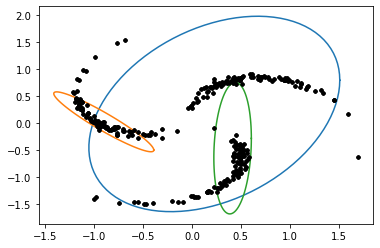

MPKL 199.15699126025095
likelihood -443.2741621583817
aic,bic 910.5483243167635 954.9937140126378


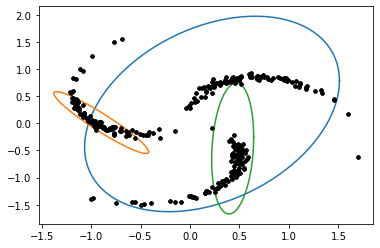

MPKL 220.98621191856574
likelihood -442.1957113433942
aic,bic 908.3914226867884 952.8368123826627


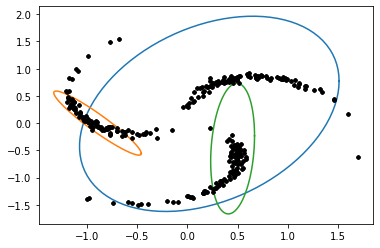

MPKL 254.84926462831925
likelihood -444.0457898488795
aic,bic 912.091579697759 956.5369693936334


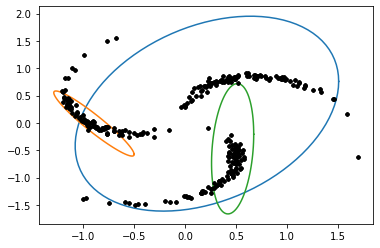

MPKL 304.57941860745404
likelihood -443.39019615230313
aic,bic 910.7803923046063 955.2257820004806


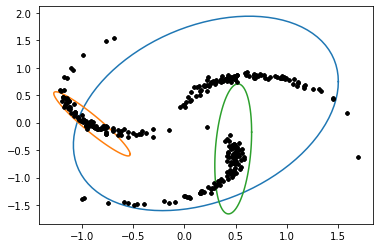

MPKL 332.44577255907507
likelihood -441.11701716841367
aic,bic 906.2340343368273 950.6794240327017


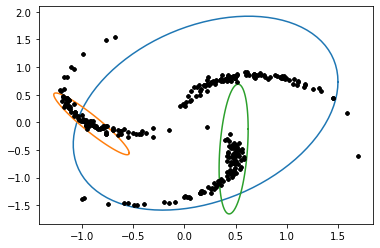

MPKL 330.7240297060672
likelihood -437.04764333842763
aic,bic 898.0952866768553 942.5406763727296


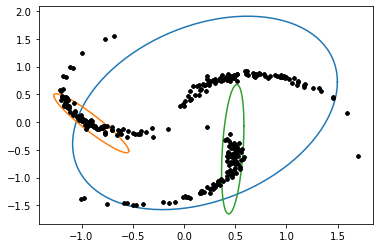

MPKL 309.4743085418216
likelihood -433.58162406725967
aic,bic 891.1632481345193 935.6086378303937


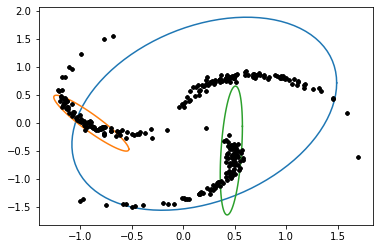

MPKL 275.05035407344667
likelihood -431.54276412039525
aic,bic 887.0855282407905 931.5309179366649


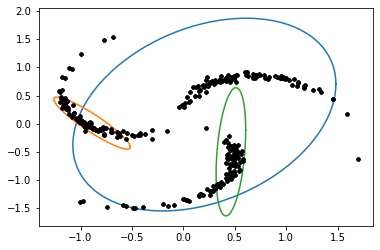

MPKL 231.88480509818697


In [7]:
for params in params_store:
    print("likelihood", test_MFA.likelihood(params))
    print("aic,bic", test_MFA.aic(params), test_MFA.bic(params))

    draw_clusters(test_MFA.unpack_params(params), data)

    kl_cov = []
    for log_proportion, mean, cov_sqrt, error in zip(*test_MFA.unpack_params(params)):
        kl_cov.append((cov_sqrt @ cov_sqrt.T) + (np.diag(error) @ np.diag(error)))
    print("MPKL", test_MFA.print_mpkl(params["means"], kl_cov))

In [8]:
### Final labels

np.array(test_MFA.labels(data, params_store[-1]))

array([0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])